# Exploratory Data analysis

1) Import package and dataset
2) Descriptive Statistics of data
3) Data Visualization
4) Hypothesis investigation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

%matplotlib inline
from collections import OrderedDict

sns.set(color_codes= True)
import statistics
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the data
client_df = pd.read_csv("client_data.csv")
price_df = pd.read_csv("price_data.csv")

In [3]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
# now implementing custom summary for statistical analysis on the dataframes

def custom_summary(df): 
    
    result = []
    
    for col in df.columns:
        
        if df[col].dtype not in ['O','datetime64[ns]']:
        
            stats = OrderedDict ({
                'Feature_Name' : col,
                'Count':df[col].count(),
                'Minimum':df[col].min(),
                'Quarter 1':df[col].quantile(0.25), 
                "Mean":df[col].mean(),
                'Median':df[col].median(),
                'Quarter 3':df[col].quantile(0.75),
                'Maximum':df[col].max(),
                "Variance":df[col].var(),
                'Standard Deviation':df[col].std(),
                "Kurtosis":df[col].kurt(),
                'Skewness':df[col].skew() ,
                'IQR':df[col].quantile(0.75) - df[col].quantile(0.25)
            })
            
            result.append(stats)
        
        
    result_df = pd.DataFrame(result)
    
    skewtype =[]
    
    for i in result_df['Skewness']:
        if i<=-1:
            skewtype.append('Highly Negatively Skewed')
        elif i<= -0.5:
            skewtype.append('Moderately Negatively Skewed')
        elif -0.5 < i < 0 :
            skewtype.append('Approx Normal Distribution (-ve)')
        elif 0 <= i < 0.5:
            skewtype.append('Approx Normal Distribution (+ve)')
        elif 0.5<= i < 1:
            skewtype.append('Moderately Positively Skewed')
        elif i >= 1:
            skewtype.append('Highly Positively Skewed')
    
    result_df['Skew_Type'] = skewtype
    
    k_type = []
    
    for i in result_df['Kurtosis']:
        if i <=  -1:
            k_type.append('Highly Platykurtic Curve')
        elif -1 < i <= -0.5:#-.9 to .9
            k_type.append('Moderately Platykurtic Curve')
        elif -0.5 < i <= 0.5: #-1,-2,-3...
            k_type.append('Mesokurtic Curve')
        elif 0.5<= i < 1:
            k_type.append('Moderately Leptokurtic Curve')
        elif i >= 1:
            k_type.append('Highly Leptokurtic Curve')
            
        
    
    result_df['Kurtosis_Type'] = k_type
    
    
    #Outlier detection
    

    Upper_limit = stats['Quarter 3'] + 1.5*stats['IQR']
    
    lower_limit = stats['Quarter 1'] -1.5*stats['IQR']
    
    if len([x for x in df[col] if (x < lower_limit) or (x > Upper_limit)]) > 0:
        
        outlier_comment = 'has outliers'
        outlier_percentage = len([x for x in df[col] if (x < lower_limit) or (x > Upper_limit)])/len(df)
    else:
        outlier_comment = 'no outliers'
        
        outlier_percentage = 0
        
    result_df['outlier_comment'] = outlier_comment
    
    result_df['outlier_percentage'] = outlier_percentage
   
    return result_df

In [5]:
custom_summary(price_df)

,Feature_Name,Count,Minimum,Quarter 1,Mean,Median,Quarter 3,Maximum,Variance,Standard Deviation,Kurtosis,Skewness,IQR,Skew_Type,Kurtosis_Type,outlier_comment,outlier_percentage
0,price_off_peak_var,193002,0.0,0.125976,0.141027,0.146033,0.151635,0.280700,0.000627,0.025032,10.100667,-0.311879,0.025659,Approx Normal Distribution (-ve),Highly Leptokurtic Curve,no outliers,0
1,price_peak_var,193002,0.0,0.000000,0.054630,0.085483,0.101673,0.229788,0.002492,0.049924,-1.873431,-0.133292,0.101673,Approx Normal Distribution (-ve),Highly Platykurtic Curve,no outliers,0
2,price_mid_peak_var,193002,0.0,0.000000,0.030496,0.000000,0.072558,0.114102,0.001318,0.036298,-1.828990,0.365508,0.072558,Approx Normal Distribution (+ve),Highly Platykurtic Curve,no outliers,0
3,price_off_peak_fix,193002,0.0,40.728885,43.334477,44.266930,44.444710,59.444710,29.271309,5.410297,32.097424,-2.889775,3.715825,Highly Negatively Skewed,Highly Leptokurtic Curve,no outliers,0
4,price_peak_fix,193002,0.0,0.000000,10.622875,0.000000,24.339581,36.490692,164.914264,12.841895,-1.542763,0.471709,24.339581,Approx Normal Distribution (+ve),Highly Platykurtic Curve,no outliers,0
5,price_mid_peak_fix,193002,0.0,0.000000,6.409984,0.000000,16.226389,17.458221,60.428734,7.773592,-1.763534,0.433076,16.226389,Approx Normal Distribution (+ve),Highly Platykurtic Curve,no outliers,0


The price data looks good

In [6]:
custom_summary(client_df)

# as it is clear the client_df has outliers which need to be Treated later before model deployement

,Feature_Name,Count,Minimum,Quarter 1,Mean,Median,Quarter 3,Maximum,Variance,Standard Deviation,Kurtosis,Skewness,IQR,Skew_Type,Kurtosis_Type,outlier_comment,outlier_percentage
0,cons_12m,14606,0.0,5674.750000,159220.286252,14115.500000,40763.750000,6.207104e+06,3.288624e+11,573465.264198,42.689777,5.997308,35089.000000,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.097152
1,cons_gas_12m,14606,0.0,0.000000,28092.375325,0.000000,0.000000,4.154590e+06,2.656022e+10,162973.059057,126.333634,9.597530,0.000000,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.097152
2,cons_last_month,14606,0.0,0.000000,16090.269752,792.500000,3383.000000,7.712030e+05,4.142750e+09,64364.196422,47.762991,6.391407,3383.000000,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.097152
3,forecast_cons_12m,14606,0.0,494.995000,1868.614880,1112.875000,2401.790000,8.290283e+04,5.700498e+06,2387.571531,147.426681,7.155853,1906.795000,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.097152
4,forecast_cons_year,14606,0.0,0.000000,1399.762906,314.000000,1745.750000,1.753750e+05,1.054812e+07,3247.786255,653.734407,16.587990,1745.750000,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.097152
5,forecast_discount_energy,14606,0.0,0.000000,0.966726,0.000000,0.000000,3.000000e+01,2.609461e+01,5.108289,24.854712,5.155098,0.000000,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.097152
6,forecast_meter_rent_12m,14606,0.0,16.180000,63.086871,18.795000,131.030000,5.993100e+02,4.377911e+03,66.165783,4.491521,1.505148,114.850000,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.097152
7,forecast_price_energy_off_peak,14606,0.0,0.116340,0.137283,0.143166,0.146348,2.739630e-01,6.062854e-04,0.024623,8.364539,-0.119586,0.030008,Approx Normal Distribution (-ve),Highly Leptokurtic Curve,has outliers,0.097152
8,forecast_price_energy_peak,14606,0.0,0.000000,0.050491,0.084138,0.098837,1.959750e-01,2.404579e-03,0.049037,-1.890755,-0.014331,0.098837,Approx Normal Distribution (-ve),Highly Platykurtic Curve,has outliers,0.097152
9,forecast_price_pow_off_peak,14606,0.0,40.606701,43.130056,44.311378,44.311378,5.926638e+01,2.012409e+01,4.485988,54.708041,-4.998772,3.704677,Highly Negatively Skewed,Highly Leptokurtic Curve,has outliers,0.097152


as it is clear the client_df has outliers which need to be Treated later before model deployement

# Data visualization

A deeper EDA for the datasets

# the list of given functions by the BCG team

In [7]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()
    
    
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )
        
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

# Churn Showcasing

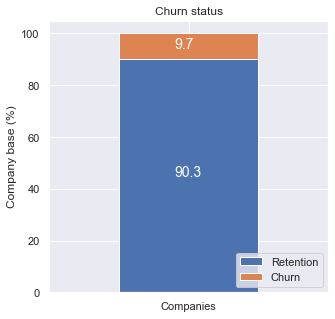

In [8]:
churn = client_df[['id','churn']]
churn.columns = ['Companies','churn']
Total_churn = churn.groupby(churn['churn']).count()
churn_percentage = Total_churn / Total_churn.sum() * 100


plot_stacked_bars(churn_percentage.transpose(),"Churn status",(5,5),legend_ = "lower right")

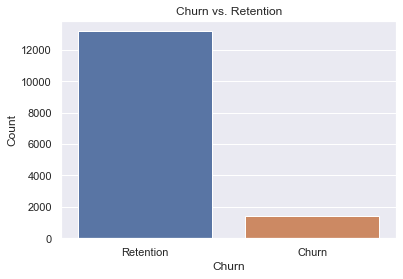

In [9]:
# different way of putting out the info
sns.countplot(x='churn', data=client_df)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn vs. Retention')
plt.xticks([0, 1], ['Retention', 'Churn'])
plt.show()

1) From both the drawings we can suggest that total 10 % of customers have churned
2) the next one shows a time series of churn

<Figure size 720x432 with 0 Axes>

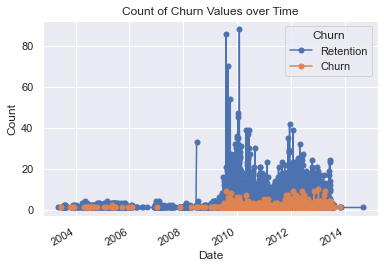

In [10]:
# Convert 'date_activ' column to datetime
client_df['date_activ'] = pd.to_datetime(client_df['date_activ'])

# Group by 'date_activ' and 'churn' and calculate the counts
count_df = client_df.groupby(['date_activ', 'churn']).size().unstack()

# Plot the count of churn values over time
plt.figure(figsize=(10, 6))
count_df.plot(kind='line', marker='o', markersize=5)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Churn Values over Time')
plt.legend(title='Churn', labels=['Retention', 'Churn'])
plt.show()

The count of churn did increase over the last 3 years

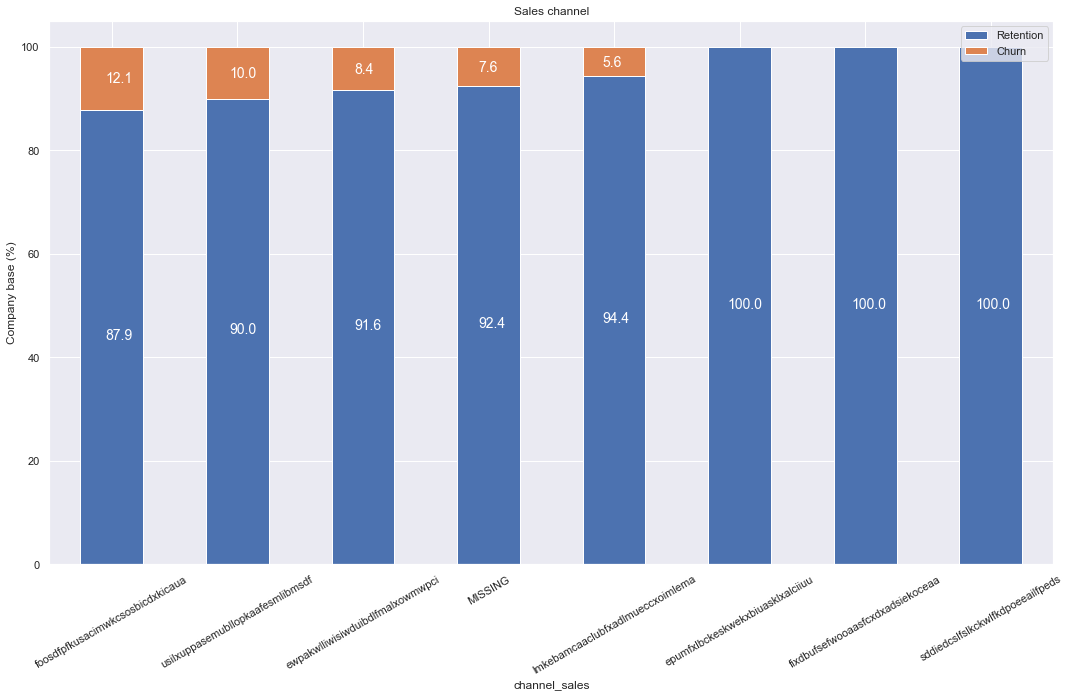

In [11]:
# Sales channel showcase
channel = client_df[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

plot_stacked_bars(channel_churn, 'Sales channel', rot_=30)

Interestingly, the churning customers are distributed over 5 different values for `channel_sales`. As well as this, the value of `MISSING` has a churn rate of 7.6%. `MISSING` indicates a missing value and was added by the team when they were cleaning the dataset. This feature could be an important feature when it comes to building our model.


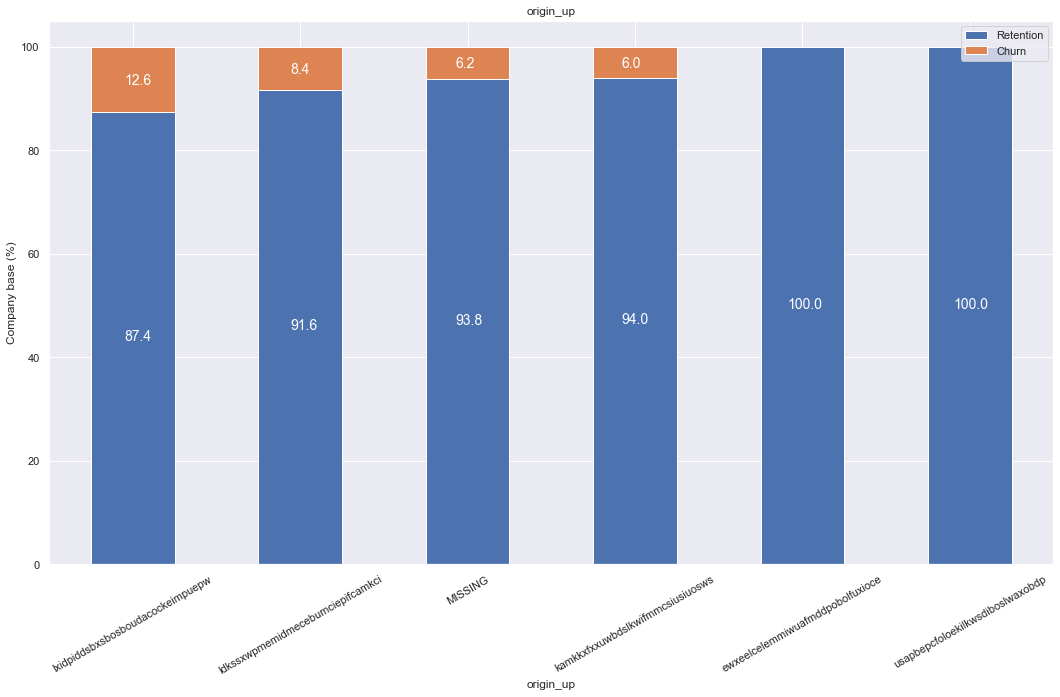

In [12]:
#origin _ showcase

origin_med = client_df[['id','origin_up','churn']]
origin_med = origin_med.groupby([origin_med['origin_up'], origin_med['churn']])['id'].count().unstack(level=1).fillna(0)
origin_churn = (origin_med.div(origin_med.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)
plot_stacked_bars(origin_churn, 'origin_up', rot_=30)


Interestingly, the churning customers are distributed over 4 different values for `origin_up`. As well as this, the value of `MISSING` has a churn rate of 6.2%. `MISSING` indicates a missing value and was added by the team when they were cleaning the dataset. This feature could be an important feature when it comes to building our model.


<Figure size 720x432 with 0 Axes>

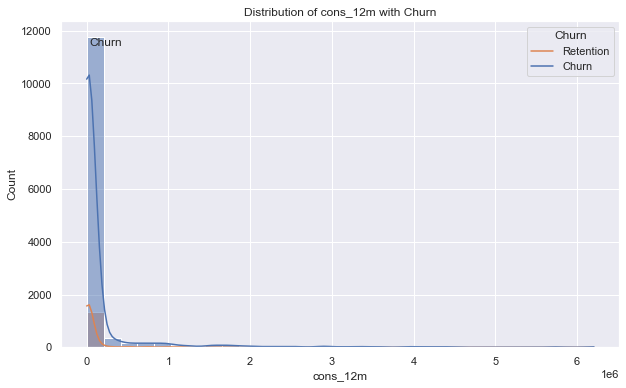

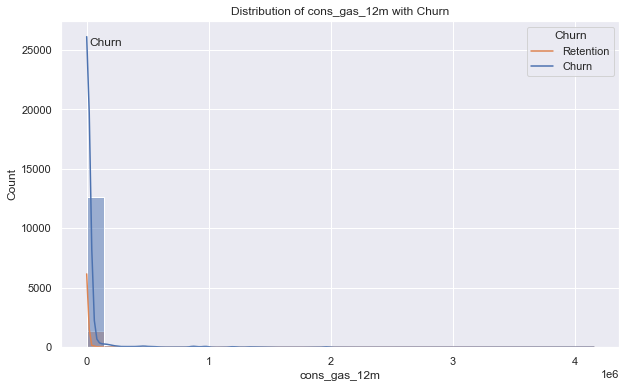

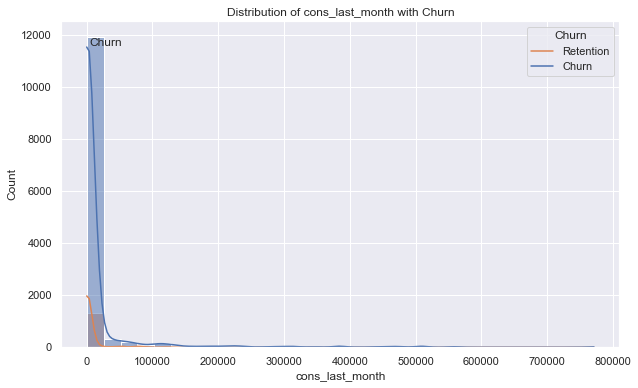

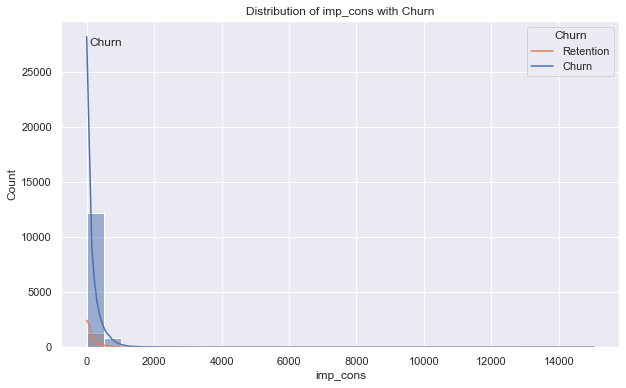

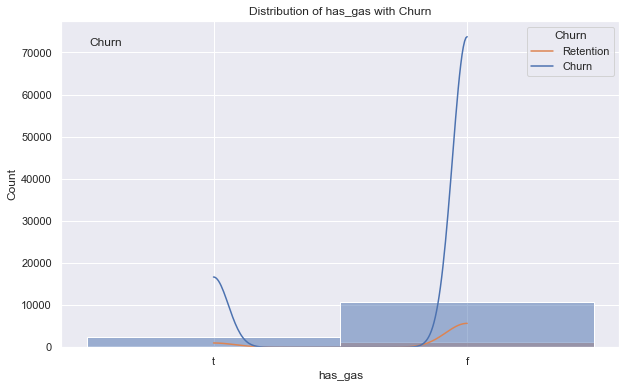

In [13]:






plt.figure(figsize=(10, 6))

price_variables = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas']  

churn_labels = {0: 'Retention', 1: 'Churn'}  # Map churn values to labels

for variable in price_variables:
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(data=client_df, x=variable, hue='churn', bins=30, kde=True)
    ax.set_xlabel(variable)
    ax.set_ylabel('Count')
    ax.set_title('Distribution of ' + variable + ' with Churn')
    ax.legend(title='Churn', labels=[churn_labels[0], churn_labels[1]])
    
    # Add label to the side
    ax.text(0.05, 0.95, 'Churn', transform=ax.transAxes, fontsize=12, verticalalignment='top')
    
    plt.show()



Clearly, the consumption data is highly positively skewed, presenting a very long right-tail towards the higher values of the distribution. The values on the higher and lower end of the distribution are likely to be outliers.

The results of custom_summary says it all

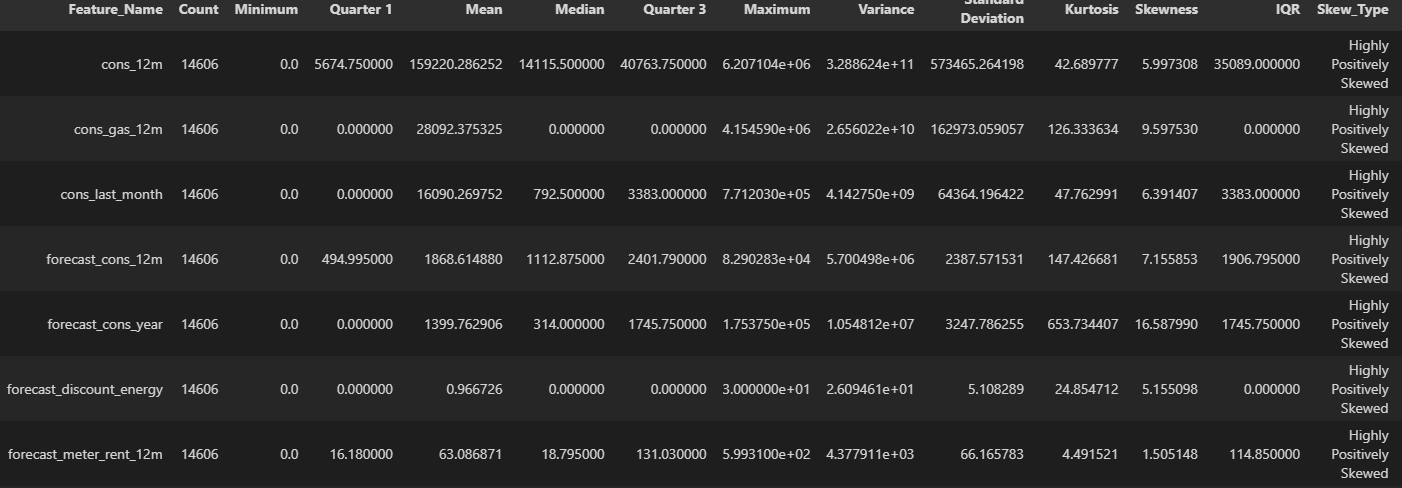

# Forecasting Measures

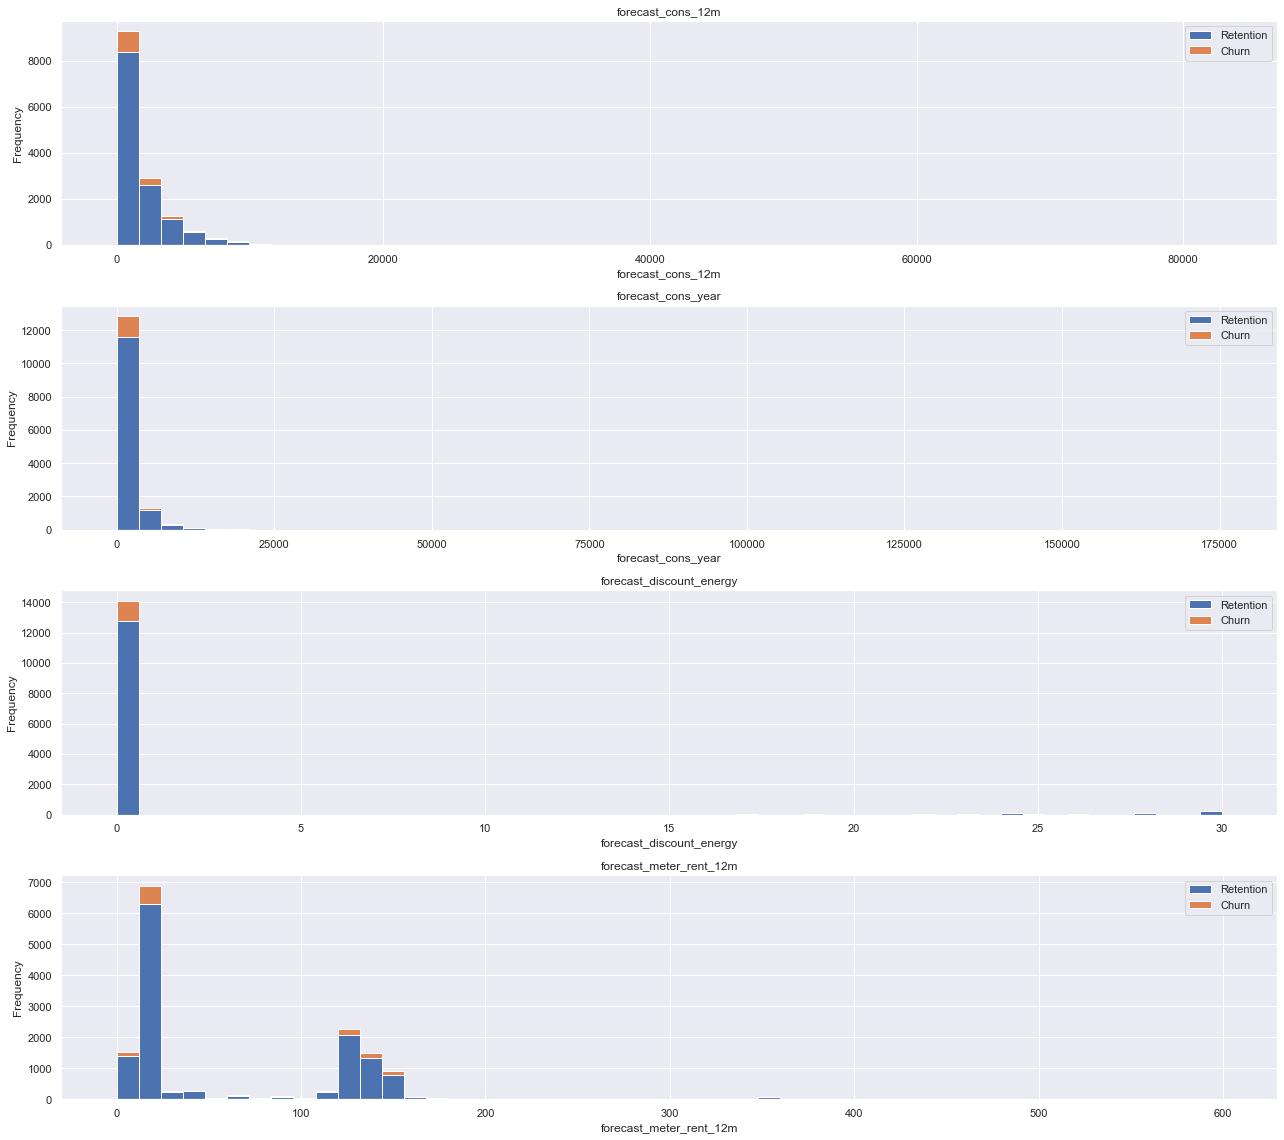

In [14]:


forecast_columns = [
    "forecast_cons_12m",
    "forecast_cons_year",
    "forecast_discount_energy",
    "forecast_meter_rent_12m"
    
]

fig, axs = plt.subplots(nrows=len(forecast_columns), figsize=(18, 4 * len(forecast_columns)))

for i, column in enumerate(forecast_columns):
    if column in client_df.columns:
        plot_distribution(client_df, column, axs[i])
        axs[i].set_title(column)
    else:
        print(f"Column '{column}' not found in DataFrame.")

plt.tight_layout()
plt.show()


Similarly to the consumption plots, we can observe that a lot of the variables are highly positively skewed, creating a very long tail for the higher values.  Some transformations will be done

# Contract Type

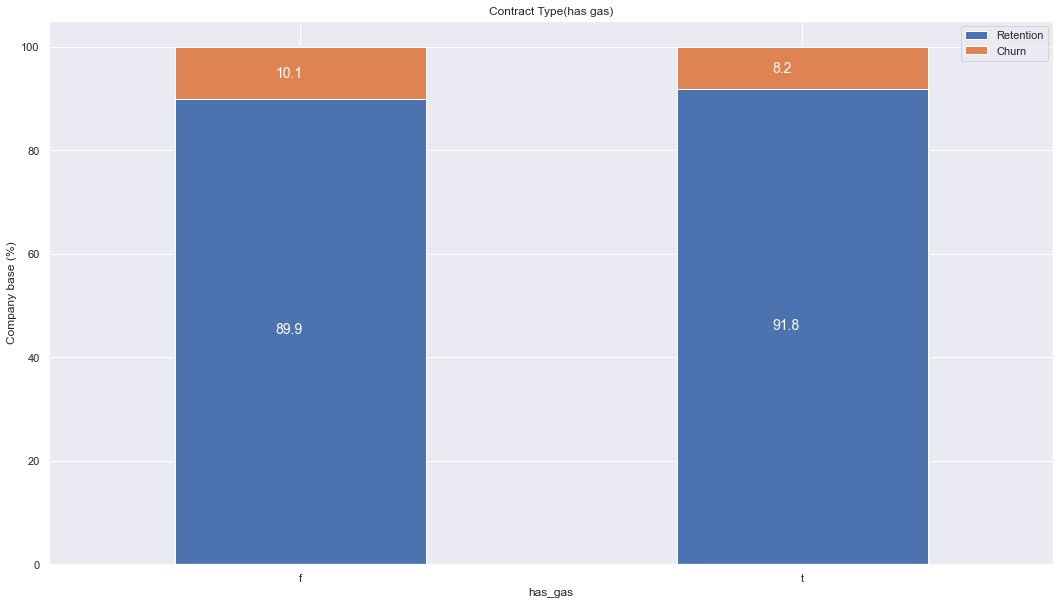

In [15]:
contract_df = client_df[['id','has_gas','churn']]
contract = contract_df.groupby([contract_df['churn'],contract_df['has_gas']])['id'].count().unstack(level=0)
contract_percent = (contract.div(contract.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)


plot_stacked_bars(contract_percent,'Contract Type(has gas)')

# Marginal Values

In [16]:
marginal_df = client_df[['id','margin_gross_pow_ele','margin_net_pow_ele','net_margin']]

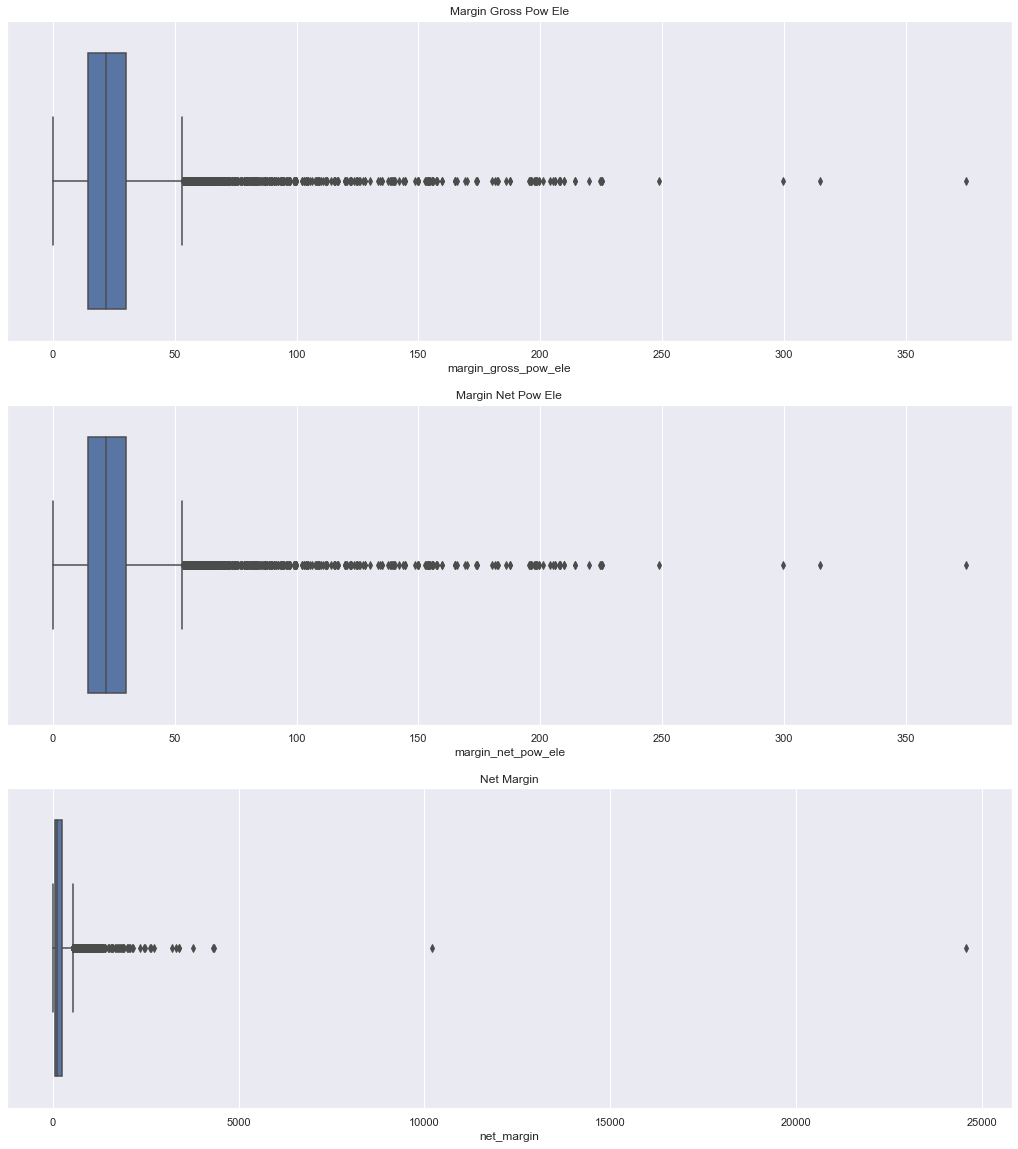

In [17]:


fig, axs = plt.subplots(nrows=3, figsize=(18, 20))

# Plot boxplots
sns.boxplot(marginal_df["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(marginal_df["margin_net_pow_ele"], ax=axs[1])
sns.boxplot(marginal_df["net_margin"], ax=axs[2])

# Set titles
axs[0].set_title("Margin Gross Pow Ele")
axs[1].set_title("Margin Net Pow Ele")
axs[2].set_title("Net Margin")



plt.show()


There are clearly outliers which are to be taken into feature engineering for consideration

# Subscribed power

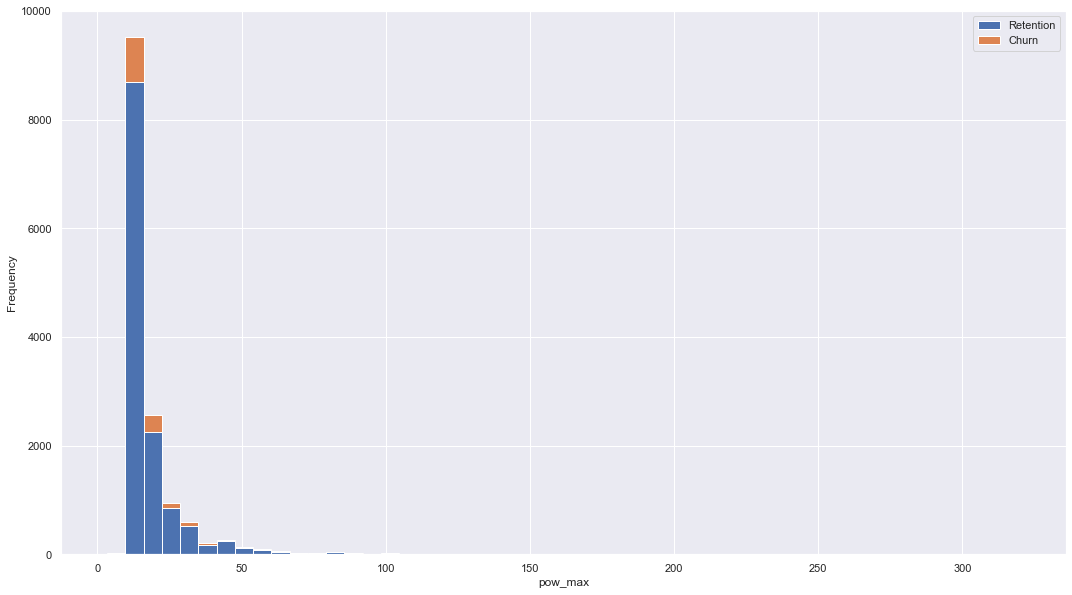

In [18]:
power_df = client_df[['id','pow_max','churn']]
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(power_df, 'pow_max', axs)

# other columns taken into consideration

In [19]:
Other_feartures_df = client_df[['id', 'nb_prod_act', 'num_years_antig','churn']]

For Products

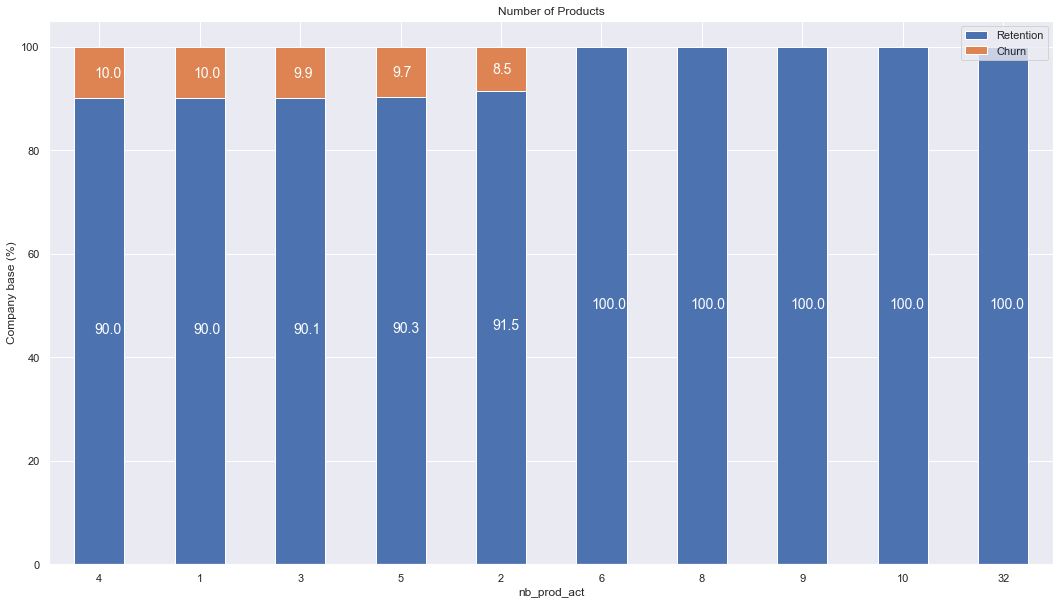

In [20]:
products = Other_feartures_df.groupby([Other_feartures_df['nb_prod_act'],Other_feartures_df['churn']])['id'].count().unstack(level=1)
product_percentage = (products.div(products.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)

plot_stacked_bars(product_percentage,"Number of Products")

For years

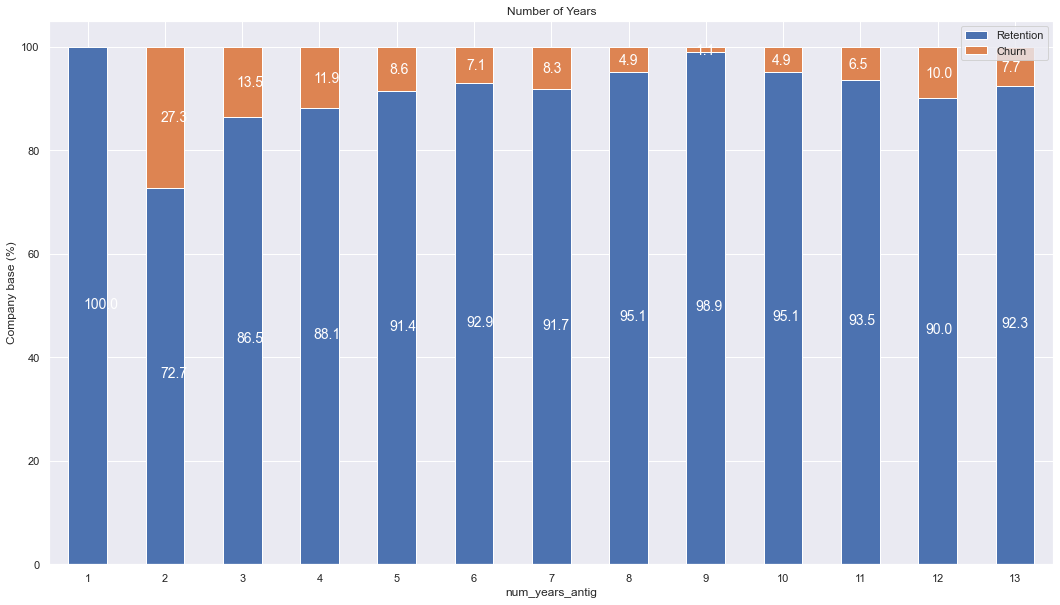

In [21]:
years_antig = Other_feartures_df.groupby([Other_feartures_df['num_years_antig'],Other_feartures_df['churn']])['id'].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1),axis=0)*100)

plot_stacked_bars(years_antig_percentage,'Number of Years')

# Now it is the concept of price sensitvity

In [22]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [23]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [24]:
# converting the data columns to datettime type

date_clumns = ["date_activ", "date_end", "date_modif_prod", "date_renewal"]
for col in date_clumns:
    client_df[col] = pd.to_datetime(client_df[col],format='%Y-%m-%d')
    
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%Y-%m-%d')

In [25]:
mean_year = price_df.groupby('id').mean().reset_index()
mean_6m = price_df[price_df['price_date'] > '2015-06-01'].groupby('id').mean().reset_index()
mean_3m = price_df[price_df['price_date'] > '2015-10-01'].groupby('id').mean().reset_index()


In [26]:
print(mean_year.columns)
print(mean_6m.columns)
print(mean_3m.columns)


Index(['id', 'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'],
      dtype='object')
Index(['id', 'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'],
      dtype='object')
Index(['id', 'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'],
      dtype='object')


In [27]:
mean_year = mean_year.rename(
    index=str,
    columns={
        "price_off_peak_var": "mean_year_price_off_peak_var",
        "price_peak_var": "mean_year_price_peak_var",
        "price_mid_peak_var": "mean_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_year_price_off_peak_fix",
        "price_peak_fix": "mean_year_price_peak_fix",
        "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
    }
)

mean_year["mean_year_price_off_peak"] = mean_year["mean_year_price_off_peak_var"] + mean_year["mean_year_price_off_peak_fix"]
mean_year["mean_year_price_peak"] = mean_year["mean_year_price_peak_var"] + mean_year["mean_year_price_peak_fix"]
mean_year["mean_year_price_mid_peak"] = mean_year["mean_year_price_mid_peak_var"] + mean_year["mean_year_price_mid_peak_fix"]





In [28]:
mean_6m = mean_6m.rename(
    index=str,
    columns={
        "price_off_peak_var": "mean_6m_price_off_peak_var",
        "price_peak_var": "mean_6m_price_peak_var",
        "price_mid_peak_var": "mean_6m_price_mid_peak_var",
        "price_off_peak_fix": "mean_6m_price_off_peak_fix",
        "price_peak_fix": "mean_6m_price_peak_fix",
        "price_mid_peak_fix": "mean_6m_price_mid_peak_fix"
    }
)

mean_6m["mean_6m_price_off_peak"] = mean_6m["mean_6m_price_off_peak_var"] + mean_6m["mean_6m_price_off_peak_fix"]
mean_6m["mean_6m_price_peak"] = mean_6m["mean_6m_price_peak_var"] + mean_6m["mean_6m_price_peak_fix"]
mean_6m["mean_6m_price_mid_peak"] = mean_6m["mean_6m_price_mid_peak_var"] + mean_6m["mean_6m_price_mid_peak_fix"]


In [29]:
mean_3m = mean_3m.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_3m_price_off_peak_var",
        "price_peak_var": "mean_3m_price_peak_var",
        "price_mid_peak_var": "mean_3m_price_mid_peak_var",
        "price_off_peak_fix": "mean_3m_price_off_peak_fix",
        "price_peak_fix": "mean_3m_price_peak_fix",
        "price_mid_peak_fix": "mean_3m_price_mid_peak_fix"
    }
)
mean_3m["mean_3m_price_off_peak"] = mean_3m["mean_3m_price_off_peak_var"] + mean_3m["mean_3m_price_off_peak_fix"]
mean_3m["mean_3m_price_peak"] = mean_3m["mean_3m_price_peak_var"] + mean_3m["mean_3m_price_peak_fix"]
mean_3m["mean_3m_price_mid_peak"] = mean_3m["mean_3m_price_mid_peak_var"] + mean_3m["mean_3m_price_mid_peak_fix"]


In [30]:
price_features = pd.merge(mean_year, mean_6m, on='id')
price_features = pd.merge(price_features, mean_3m, on='id')

In [31]:
price_features.head()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,...,mean_6m_price_mid_peak,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,16.365283,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,...,16.360973,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


# merging with client(churn data to check correlation with churn)

In [32]:

analysis = pd.merge(price_features,client_df[['id','churn']],on='id')
analysis.head()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


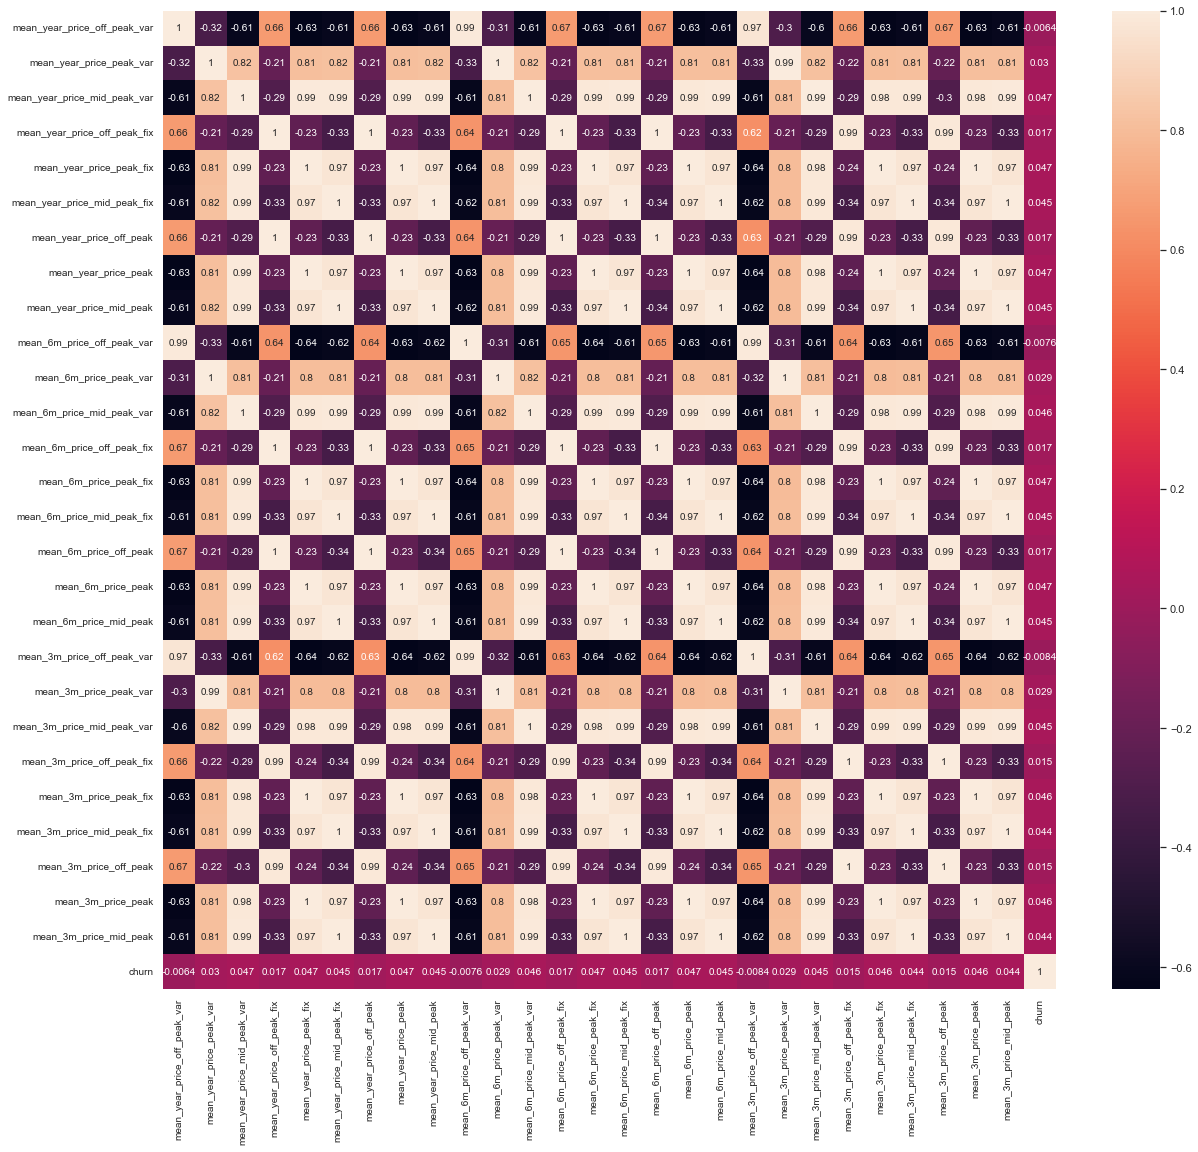

In [33]:
corr = analysis.corr()

#plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

 The Heat map suggest a a high number of correlation betwen the price sensitivity variables and churn. The lienar relationship is low , so it needs to be worked on feature engineering

# merging it with the client data

In [34]:
merged_df = pd.merge(client_df.drop(columns=['churn']), analysis, on='id')

In [35]:
merged_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


In [36]:
# convert it into csv file

merged_df.to_csv("clean_data post EDA.csv")